In [2]:
def knapsack_dual_dp(weights, values, V):
    n = len(values)
    # 初始化 dp 表
    dp = [[float('inf')] * (V + 1) for _ in range(n + 1)]
    dp[0][0] = 0

    # 填充 dp 表
    for i in range(1, n + 1):
        for j in range(V + 1):
            if j < values[i - 1]:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = min(dp[i - 1][j], dp[i - 1][j - values[i - 1]] + weights[i - 1])

    # 找到最小重量
    return dp[n][V] if dp[n][V] != float('inf') else "No solution"

In [3]:
def knapsack_dual_approx(weights, values, V):
    n = len(values)
    items = sorted([(values[i], weights[i]) for i in range(n)], key=lambda x: x[0] / x[1], reverse=True)

    total_weight = 0
    total_value = 0

    for v, w in items:
        if total_value + v <= V:
            total_weight += w
            total_value += v
        else:
            break

    return total_weight if total_value <= V else "No feasible solution"

In [4]:
import time

def time_analysis(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

# 动态规划和近似算法的定义可以保持不变

# 示例数据
weights = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
values = [60, 100, 120, 140, 160, 180, 200, 220, 240, 260]
V = 500

# 分析动态规划算法
result_dp, time_dp = time_analysis(knapsack_dual_dp, weights, values, V)
print("Dynamic Programming:")
print("Result:", result_dp)
print("Time taken:", time_dp, "seconds")

# 分析近似算法
result_approx, time_approx = time_analysis(knapsack_dual_approx, weights, values, V)
print("\nApproximation Algorithm:")
print("Result:", result_approx)
print("Time taken:", time_approx, "seconds")


Dynamic Programming:
Result: 140
Time taken: 0.0006489753723144531 seconds

Approximation Algorithm:
Result: 100
Time taken: 8.344650268554688e-06 seconds


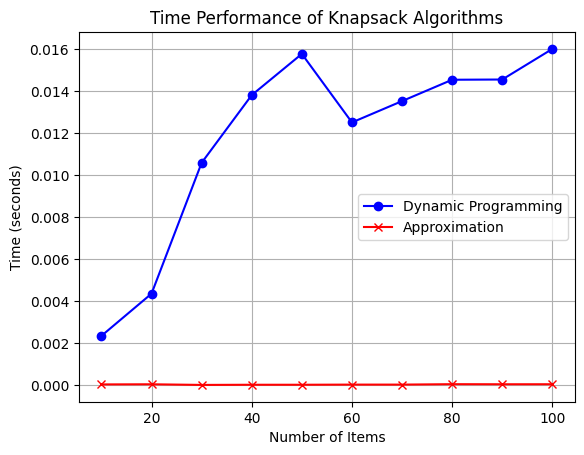

In [5]:
import matplotlib.pyplot as plt
import time
import random

# 动态规划算法
def knapsack_dual_dp(weights, values, V):
    n = len(values)
    dp = [[float('inf')] * (V + 1) for _ in range(n + 1)]
    dp[0][0] = 0

    for i in range(1, n + 1):
        for j in range(V + 1):
            if j < values[i - 1]:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = min(dp[i - 1][j], dp[i - 1][j - values[i - 1]] + weights[i - 1])

    return dp[n][V] if dp[n][V] != float('inf') else "No solution"

# 近似算法
def knapsack_dual_approx(weights, values, V):
    n = len(values)
    items = sorted([(values[i], weights[i]) for i in range(n)], key=lambda x: x[0] / x[1], reverse=True)

    total_weight = 0
    total_value = 0

    for v, w in items:
        if total_value + v <= V:
            total_weight += w
            total_value += v
        else:
            break

    return total_weight if total_value <= V else "No feasible solution"

# 时间测试函数
def measure_time(func, weights, values, V):
    start_time = time.time()
    func(weights, values, V)
    return time.time() - start_time

# 生成测试数据
sizes = range(10, 101, 10)
dp_times = []
approx_times = []
V = 1000

for size in sizes:
    weights = [random.randint(1, 100) for _ in range(size)]
    values = [random.randint(1, 100) for _ in range(size)]

    dp_time = measure_time(knapsack_dual_dp, weights, values, V)
    approx_time = measure_time(knapsack_dual_approx, weights, values, V)

    dp_times.append(dp_time)
    approx_times.append(approx_time)

# 绘图
plt.plot(sizes, dp_times, label='Dynamic Programming', color='blue', marker='o')
plt.plot(sizes, approx_times, label='Approximation', color='red', marker='x')

plt.xlabel('Number of Items')
plt.ylabel('Time (seconds)')
plt.title('Time Performance of Knapsack Algorithms')
plt.legend()
plt.grid(True)
plt.show() 